In [3]:
import torch
import pandas as pd 
from spender.data.sdss import BOSS
import matplotlib.pyplot as plt
import smplotlib
import os 
import numpy as np
from astropy.io import fits 

In [44]:
github = "pmelchior/spender"
sdss, model = torch.hub.load(github, 'sdss_II', map_location=torch.device('cpu'))

plates = []
mjds = []
fiberids = []

waves = []
fluxes = []

zs = [] 

dir = '/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/spectra'
for sub_dir in os.listdir(dir)[0:20]: 
    if '.' not in sub_dir:
        sub_dir = os.path.join(dir, sub_dir)
        for file in os.listdir(sub_dir): 
            if '.1' not in file: 
                file_list = file.split('-')
                plates.append(int(file_list[1]))
                mjds.append(int(file_list[2]))
                fiberids.append(int(file_list[3].split('.')[0]))

                hdul = fits.open(os.path.join(sub_dir, file))

                waves.append(10**hdul[1].data['loglam'])
                fluxes.append(hdul[1].data['model']) # flux is raw, model is smoothed
                zs.append(hdul[2].data[0]['Z'])

Using cache found in /Users/yaroslav/.cache/torch/hub/pmelchior_spender_main


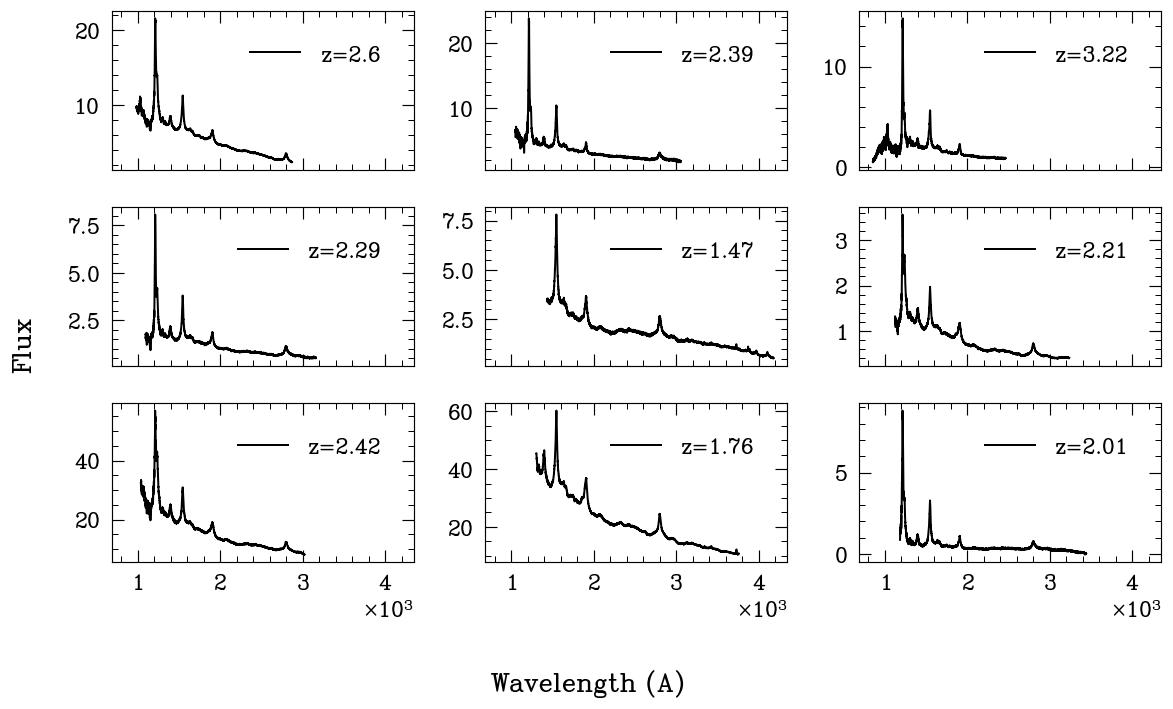

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(10,6), sharex=True)

counter = 0
for i in range(0,3):
    for j in range(0,3):
        
        axs[i,j].plot(waves[counter]/(1+zs[counter]), fluxes[counter], label=f'z={str(round(zs[counter], 2))}')
        axs[i,j].legend()
        counter+=1

fig.supxlabel('Wavelength (A)')
fig.supylabel('Flux')
fig.tight_layout()

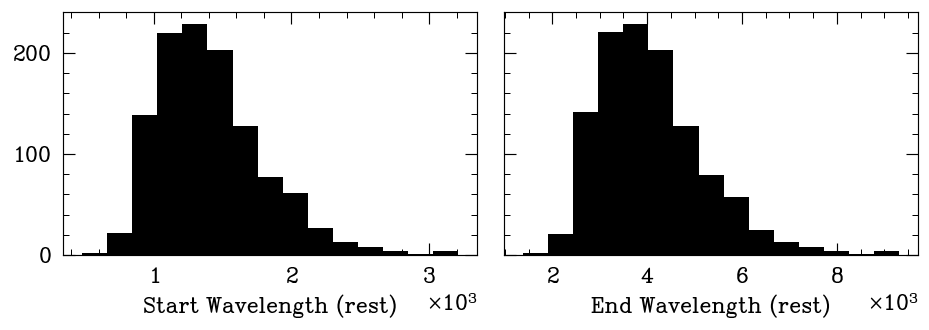

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)

rest_mins = np.array([waves[i][0]/(1+zs[i]) for i in range(len(zs))])
rest_maxes = np.array([waves[i][-1]/(1+zs[i]) for i in range(len(zs))])

axs[0].hist(rest_mins)
axs[0].set(xlabel='Start Wavelength (rest)')

axs[1].hist(rest_maxes)
axs[1].set(xlabel='End Wavelength (rest)')

fig.tight_layout()

Text(0.5, 0, 'z')

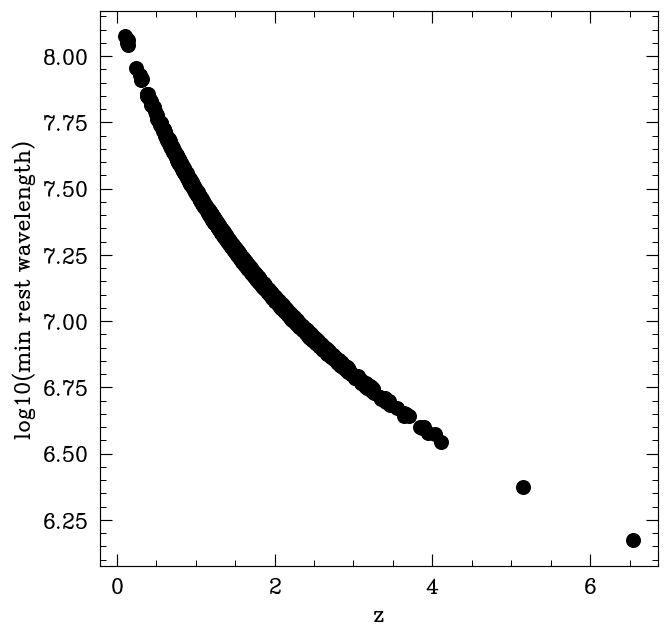

In [51]:
plt.scatter(zs, np.log(rest_mins))
plt.ylabel('log10(min rest wavelength)')
plt.xlabel('z') # wow, this just gives me so much respect for spender! 

In [63]:
mask = np.logical_and(rest_mins<1500, rest_maxes>2500) # this probably produces bias, no? 
n_cut = np.sum(mask)

print(100*n_cut/len(rest_mins), n_cut)
print(len(mask))

60.72056239015817 691
1138


4610.0


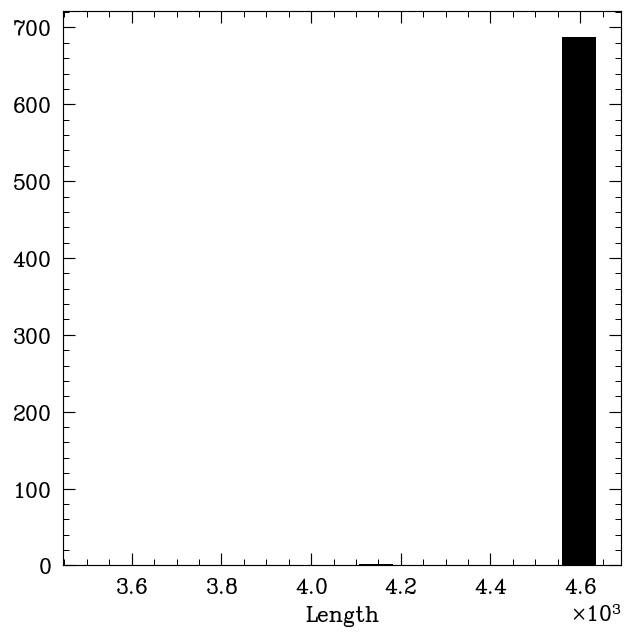

In [67]:

lengths = np.array([len(i) for i in waves])
plt.hist(lengths[mask])
plt.xlabel('Length')

print(np.median(lengths))

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True,